In [11]:
import copy
import sys
sys.path.insert(0, "../../")
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_file_handler import Atom_File_handler
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom_collection_plotter import Animator, Atom_Collection_Plotter
from classes.calculators.lennardjones import LJGauss
from classes.optimizers.random_struct_search import Line_searcher1
from classes.optimizers.bassin_hopping import Bassin_Hopper
from classes.optimizers.md_simulator1 import MDT_simulator
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class Atom_plotter(Animator):
    def __init__(self, default_cols=("C0", "C1"), markersize=50, scale_with_mass=False, alpha=1) -> None:
        super().__init__(default_cols, markersize, scale_with_mass, alpha)

In [123]:
def make_random_conf(N_atoms=12, unit_cell=(np.array([10.0,0.0]), np.array([0.0,10.0])), pbc=True):
    random_poses = np.random.randn(N_atoms,2)*1.0+ (5,5) #np.random.rand(N_atoms, 2)*np.linalg.norm(unit_cell[0])
    atomlist = [Atom(position=pos) for pos in random_poses]
    atom_col = Atom_Collection(atomlist=atomlist, unit_cell=unit_cell, pbc=pbc)
    atom_col.calculator = LJGauss()
    return atom_col

atom_writer = Atom_File_handler()

In [124]:
class MD_optimizer():
    def __init__(self) -> None:
        pass

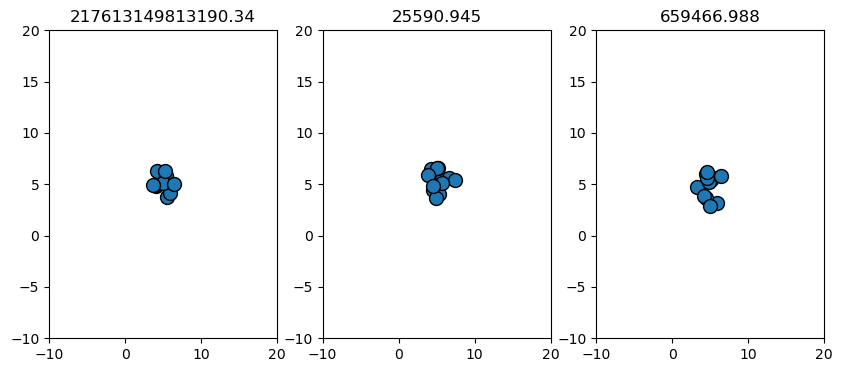

In [125]:
optimizer = MDT_simulator(atom_col=make_random_conf(), temp=0.05, log_level="all_steps")
optimizer.N2_integration()#run_MDsimulation(N_steps=1)

atom_plotter = Atom_plotter(markersize=10)
fig, axs = plt.subplots(1,3, figsize=(10,4))
for ax, atom_col in zip(axs, [1,2,3]):
    ax.set_xlim([-10.0,20.0])
    ax.set_ylim([-10.0,20.0])
    a_col = make_random_conf()
    atom_plotter(atom_col=make_random_conf(), ax=ax)
    ax.set_title(round(a_col.get_potential_energy(),3))


c:\Users\karst\Computational-Physics\Week7\exercise 38\../..\classes\optimizers\metropol.py:92: RuntimeWarning: overflow encountered in exp
  acc_prob = np.exp(-(E_new-E_currently)/self.T)


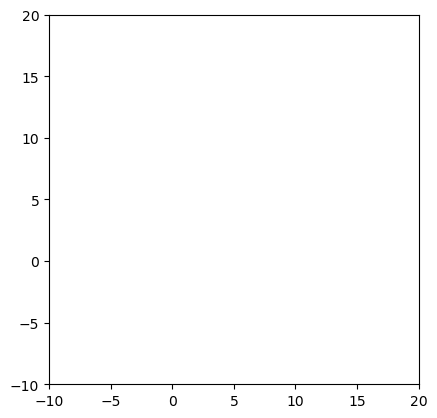

In [195]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim([-10, 20.0])
ax.set_ylim([-10, 20.0])

atom_writer = Atom_File_handler()

for i in range(3):
    opt_cols = []
    for num in range(100):
        optimizer = MDT_simulator(atom_col=make_random_conf(), temp=0.0)
        for temp in [2.0,1.0,0.5,0.05]:
            optimizer.temp = temp
            optimizer.run_MDsimulation(N_steps=40, time_step=1e-7)
        last_atom_col = optimizer.logged_atom_cols[-1]
        optimizer = Bassin_Hopper(atom_col=last_atom_col, T=np.random.rand(1)*0.8, N_lin_search=300, N_metropol=30)
        optimizer.run(N_max=3)
        opt_cols.append(optimizer.best_atom_col)
    atom_writer.save_atom_collections(atom_cols=opt_cols, filename=f"relaxed_structs{i}")


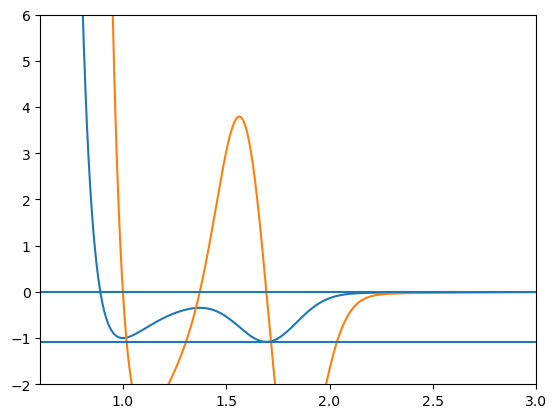

In [189]:
calculator = LJGauss()
def _dV_dr(r, gauss_eps=1.0, gauss_sigma2=0.02, r0=1.7):
        t1 = (1.0**6)/(r**7)
        t2 = (1.0**12)/(r**13)
        lennard_term = 12.0*(t1 - t2)
        #np.fill_diagonal(r, 0.0)
        gauss_term = gauss_eps/gauss_sigma2*np.exp(-(r-r0)**2/(2.0*gauss_sigma2))*(r-r0)
        total_force = lennard_term+gauss_term
        #np.fill_diagonal(total_force, 0.0)
        #np.fill_diagonal(r, np.inf)
        return total_force

rs = np.linspace(0.8, 4, 5000)
fig, ax = plt.subplots()


ax.set_xlim([0.6,3])
ax.set_ylim([-2,6])
ax.plot(rs, calculator(rs))
ax.plot(rs, -_dV_dr(rs))
ax.hlines(0.0, -10, 10)
ax.hlines(-1.09, -10, 10)

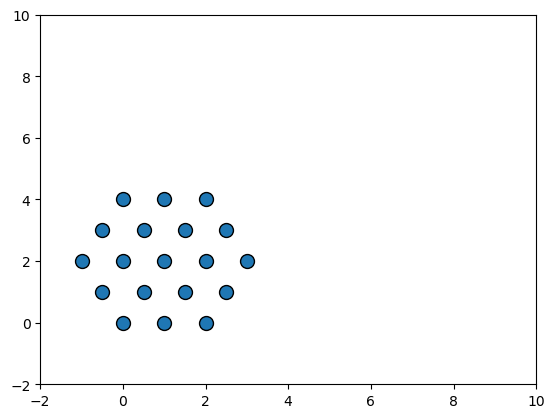

In [8]:
fig, ax = plt.subplots()
ax.set_xlim([-2, 10])
ax.set_ylim([-2, 10])
poses = []
j = 0
for ins in [[0,1,2], [-0.5,0.5,1.5,2.5], [-1.0,0.0,1.0,2.0,3.0], [-0.5,0.5,1.5,2.5], [0,1,2]]:
    for i in ins:
        poses.append(np.array([i, j]))
    j+=1
atom_col = Atom_Collection(atomlist=[Atom(position=pos) for pos in poses])
d = atom_plotter(atom_col=atom_col, ax=ax)
atom_col.calculator = LJGauss()
optimizer=Line_searcher1(atom_col=atom_col)
optimizer.run()

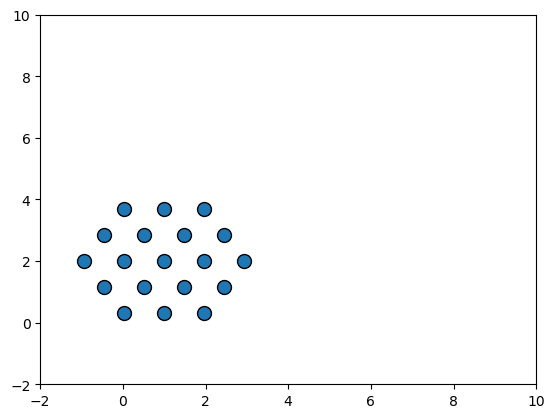

In [9]:
fig, ax = plt.subplots()
ax.set_xlim([-2, 10])
ax.set_ylim([-2, 10])
d = atom_plotter(atom_col=optimizer.best_atom_col, ax=ax)

In [10]:
optimizer.best_atom_col.get_potential_energy()

-80.46950061825316